In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris

In [2]:
dataset = load_iris()
dataset.keys()

dict_keys(['data', 'target_names', 'target', 'feature_names', 'DESCR'])

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.7 KB


In [4]:
df['Class'] = dataset.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [5]:
df.Class.value_counts()

2    50
1    50
0    50
Name: Class, dtype: int64

In [6]:
df['sepal length (cm)'].min(), df['sepal length (cm)'].max()

(4.3, 7.9)

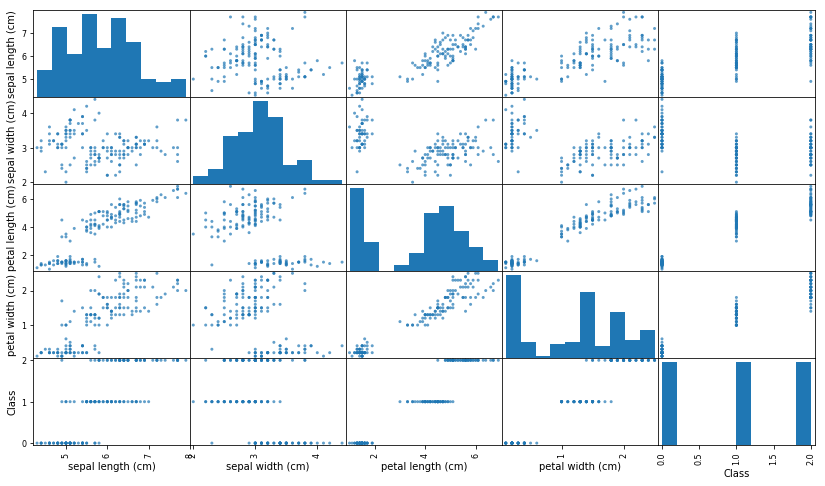

In [7]:
%matplotlib inline
pd.plotting.scatter_matrix(df, alpha = 0.7, figsize = (14,8))
None

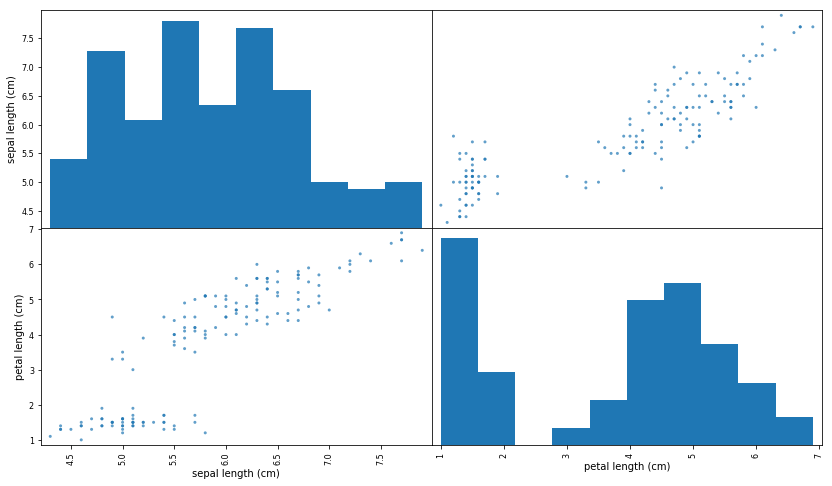

In [8]:
%matplotlib inline
pd.plotting.scatter_matrix(df[['sepal length (cm)', 'petal length (cm)']], alpha = 0.7, figsize = (14,8))
None

In [9]:
df[df.Class == 0]['sepal length (cm)'].min(), \
df[df.Class == 0]['sepal length (cm)'].max(), 

(4.3, 5.8)

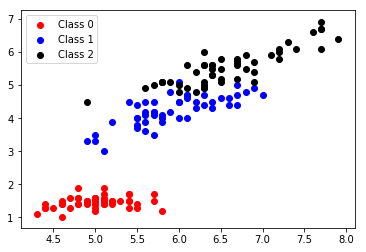

In [10]:
plt.scatter(df[df.Class == 0]['sepal length (cm)'], 
            df[df.Class == 0]['petal length (cm)'], 
            color='red', label='Class 0')

plt.scatter(df[df.Class == 1]['sepal length (cm)'], 
            df[df.Class == 1]['petal length (cm)'], 
            color='blue', label='Class 1')

plt.scatter(df[df.Class == 2]['sepal length (cm)'], 
            df[df.Class == 2]['petal length (cm)'], 
            color='black', label='Class 2')

plt.legend(loc='upper left')
None

In [11]:
df.columns.values

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Class'], dtype=object)

In [12]:
df_2 = pd.DataFrame()

for column in df.columns.values.tolist()[:4]:
    df_2[column] = (df[column] - df[column].min()) \
                   / (df[column].max() - df[column].min())
    
df_2['Class'] = df['Class']    
        
df_2.head()        

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [13]:
df_3 = pd.DataFrame()

for column in df.columns.values.tolist()[:4]:
    x_c = (df[column].max() - df[column].min()) / 2
    a = .2
    e = 2.7
    
    df_3[column] = 1 / (np.exp( -1 * a * (df[column] - x_c)) + 1) 
    
df_3['Class'] = df['Class']    
                          
df_3.head()                          

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,0.659260,0.613014,0.423115,0.450166,0
1,0.650219,0.589040,0.423115,0.450166,0
2,0.641067,0.598688,0.418241,0.450166,0
3,0.636453,0.593873,0.428004,0.450166,0
4,0.654753,0.617748,0.423115,0.450166,0


In [14]:
df_3['sepal length (cm)'].min(), \
df_3['sepal length (cm)'].max()

(0.6224593312018546, 0.7720635494267837)